In [1]:
import pandas as pd
import numpy as np
from nltk import *
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../datas/train_set.csv',encoding='utf8')

In [3]:
set(df_train['class'].values)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [4]:
df_train_token = df_train['article']

In [5]:
##制作词典
train_token = [word for line in df_train_token.values for word in line.split(' ')]

In [6]:
len(set(train_token))

13516

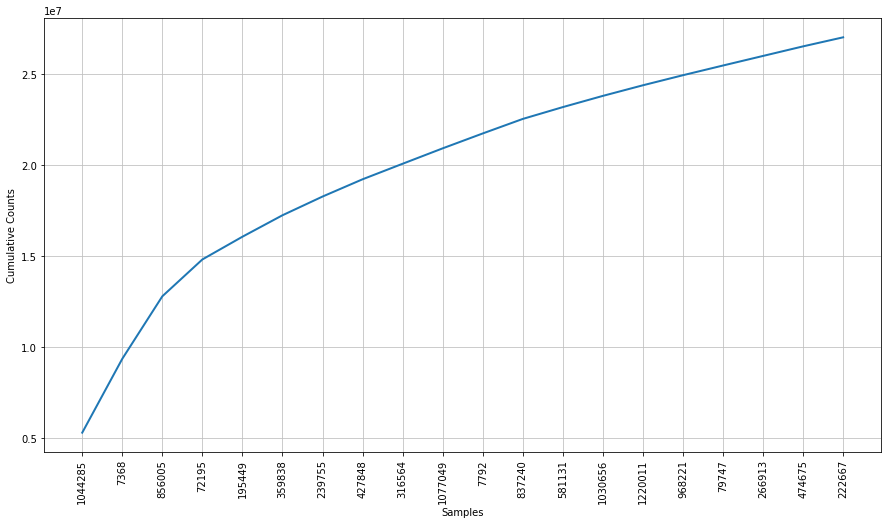

In [9]:
from nltk import *
import matplotlib.pyplot as plt
fdist = FreqDist(train_token)
plt.figure(figsize=(15,8))
fdist.plot(20,cumulative=True)

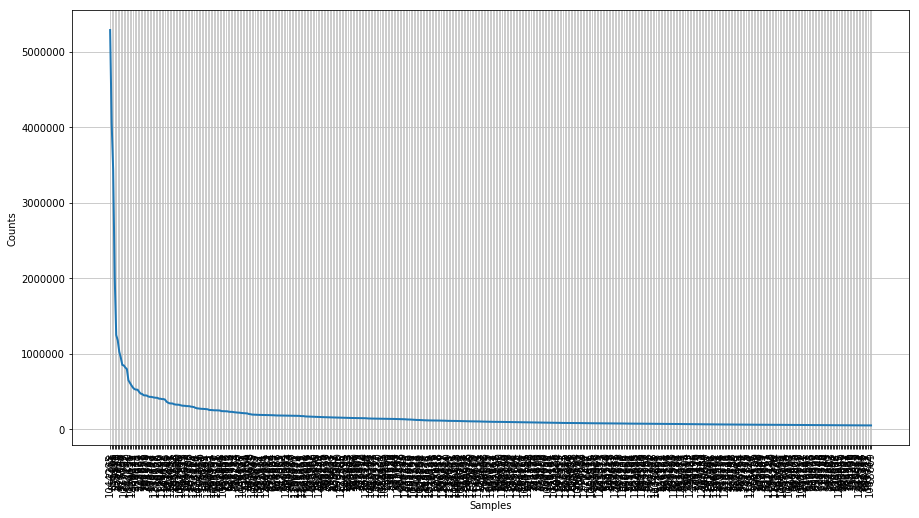

In [8]:
plt.figure(figsize=(15,8))
fdist.plot(500,cumulative=False)

In [10]:
most_common_token = set([i[0] for i in fdist.most_common()[:10]])
most_common_token

{'1044285',
 '1077049',
 '195449',
 '239755',
 '316564',
 '359838',
 '427848',
 '72195',
 '7368',
 '856005'}

In [11]:
hapaxes = set(fdist.hapaxes())
len(hapaxes)

2321

In [12]:
### 去除高频词好低频词
filterd_token = [token for token in train_token if token not in hapaxes and token not in most_common_token]

In [13]:
print(len(train_token),len(filterd_token),len(set(filterd_token)))

120390273 99461494 11185


In [15]:
def build_vocab(filterd_tokens, vocab_size=10000):
    """根据训练集构建词汇表，存储"""
    counter = Counter(filterd_tokens)
    count_pairs = counter.most_common(vocab_size - 1)
    words, _ = list(zip(*count_pairs))
    # 添加一个 <PAD> 来将所有文本pad为同一长度
    words = ['<PAD>'] + list(words)
    return words
total_words = build_vocab(filterd_token)

In [16]:
total_words[:10]

['<PAD>',
 '7792',
 '837240',
 '581131',
 '1030656',
 '1220011',
 '968221',
 '79747',
 '266913',
 '474675']

In [17]:
train_token.clear()
filterd_token.clear()
df_train = None

In [18]:
df_test = pd.read_csv('../datas/test_set.csv',encoding='utf8')

In [19]:
df_test_token = df_test['article']
test_token = [word for line in df_test_token.values for word in line.split(' ')]

In [20]:
### 去除高频词好低频词
filterd_token = [token for token in test_token if token not in hapaxes and token not in most_common_token]
print(len(test_token),len(filterd_token),len(set(filterd_token)))

120454882 99480690 12899


In [21]:
test_total_words = build_vocab(filterd_token)

In [22]:
final_total_words = [total_words.append(token) for token in test_total_words if  token not in total_words]

In [23]:
print(len(total_words),len(final_total_words))

10909 909


In [24]:
with open('total_token','w',encoding='utf8') as f:
    f.write('\n'.join(total_words) + '\n')

In [25]:
np.save('total_token',total_words)

In [26]:
np.load('total_token.npy')

array(['<PAD>', '7792', '837240', ..., '409632', '692710', '1117156'],
      dtype='<U7')

In [27]:
##构建词典索引映射
def build_word_to_id():
    tokens = np.load('total_token.npy')
    word_to_id = dict(zip(tokens, range(len(tokens))))
    return word_to_id

In [28]:
word_to_id = build_word_to_id()

In [29]:
#保存word_to_id
np.save('word_to_id',word_to_id)

In [30]:
np.load('word_to_id.npy').tolist().get('<PAD>')

0

In [31]:
df_test = None
test_token.clear()
filterd_token.clear()


### 词典构建好了，接下来用词典处理原始文章

In [32]:
df_train = pd.read_csv('../datas/train_set.csv',encoding='utf8')['article'].values
df_test = pd.read_csv('../datas/test_set.csv',encoding='utf8')['article'].values

In [33]:
tokens = set(np.load('total_token.npy'))
word_to_id = np.load('word_to_id.npy').tolist()
filterd_df_train = [[word_to_id.get(word) for word in line.split(' ') if word in tokens] for line in df_train]

In [34]:
all_tokens_num = len([j for i in filterd_df_train for j in i])
total_articls = len(filterd_df_train)
avarage_length = all_tokens_num / total_articls
print('平均长度:{}'.format(avarage_length))

平均长度:972.4551854278088


In [35]:
np.save('train_tokens',filterd_df_train)

In [36]:
filterd_df_test = [[word_to_id.get(word) for word in line.split(' ') if word in tokens] for line in df_test]
all_tokens_num = len([j for i in filterd_df_test for j in i])
total_articls = len(filterd_df_test)
avarage_length = all_tokens_num / total_articls
print('平均长度:{}'.format(avarage_length))

平均长度:972.6317256079079


In [37]:
np.save('test_tokens',filterd_df_test)

In [38]:
np.load('label_ids.npy')

array([14,  3, 12, ..., 12,  4, 11], dtype=int64)

In [39]:
len(filterd_df_test)

102277